# TDL - Assignment 1 - PES1UG20CS135
Author - Divya K - divya110702@gmail.com

In [44]:
# Import Required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [46]:
# Specifying dataset path
data_path = "/kaggle/input/stanford-dogs-dataset/images/Images"
import os
print(os.path.exists(data_path))

True


In [47]:
# Create a Data Generator Object
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    # Specify that all the data is there in a single folder and the datagen must split it
    # If data is present in separate train and test dirs, no need for this
    validation_split = 0.2, # Splits 20% of data randomly as validation data from the directory
    # We normalise the pixel so we have to deal with just 0-1 values rather than 0-255 pixel values
    rescale = 1./255.
)

In [48]:
# flow_from_directory create a Dataloader object which contains all the images
# in the folders along with their labels - parent folder names
train_dataset = datagen.flow_from_directory(
    data_path,
    # Specify a size that all images should be in
    target_size = (224,224),
    # Number of Batches
    batch_size = 32,
    # If validation_split is used in ImageDataGenerator, we have to specify if
    # this is Train split or Test split
    subset = 'training',
    # We shuffle the dataset before batching to avoid locality bias
    shuffle = True,
    class_mode='categorical'
)

Found 16508 images belonging to 120 classes.


In [49]:
validation_dataset = datagen.flow_from_directory(
    data_path,
    # Specify a size that all images should be in
    target_size = (224,224),
    # Number of Batches
    batch_size = 32,
    # If validation_split is used in ImageDataGenerator, we have to specify if
    # this is Train split or Test split
    subset = 'validation',
    class_mode='categorical'
)

Found 4072 images belonging to 120 classes.


(32, 224, 224, 3)
(32, 120)


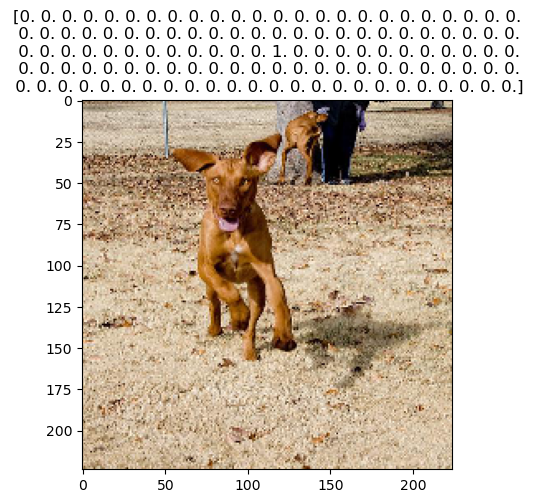

In [50]:
# Iterate through dataloader - Sanity check
for inp, labels in train_dataset:
    print(inp.shape) # (batch_size, height, width, depth)
    print(labels.shape) # (batch_size, num_of_classes)
    # Show one image
    plt.imshow(inp[0])
    # Show the class as the title
    plt.title(str(labels[0]))
    plt.show()
    break

*Note*: The classes are inferred from the directory structure and one hot encoded. For dir structure, 
the folders are first arranged ascending in alphanumerical manner

# CNN

In [51]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler 
from random import sample
import keras
from keras.models import Sequential

In [52]:
cnn_model = Sequential()
# layer 1
cnn_model.add(Conv2D(16, (3, 3), use_bias=False, input_shape=(224, 224, 3)))
cnn_model.add(BatchNormalization(axis=3, scale=False))
cnn_model.add(Activation("relu"))
cnn_model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
cnn_model.add(Dropout(0.2))
# layer 2
cnn_model.add(Conv2D(32, (3, 3), use_bias=False, padding='same'))
cnn_model.add(BatchNormalization(axis=3, scale=False))
cnn_model.add(Activation("relu"))
cnn_model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
cnn_model.add(Dropout(0.2))
# layer 3
cnn_model.add(Conv2D(64, (3, 3), use_bias=False, padding='same'))
cnn_model.add(BatchNormalization(axis=3, scale=False))
cnn_model.add(Activation("relu"))
cnn_model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'))
# layer 4
cnn_model.add(Conv2D(128, (3, 3), use_bias=False, padding='same'))
cnn_model.add(BatchNormalization(axis=3, scale=False))
cnn_model.add(Activation("relu"))
cnn_model.add(Flatten())
cnn_model.add(Dropout(0.2))
# fully connected layers
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dense(120, activation='softmax'))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_406 (Conv2D)         (None, 222, 222, 16)      432       
                                                                 
 batch_normalization_406 (Ba  (None, 222, 222, 16)     48        
 tchNormalization)                                               
                                                                 
 activation_406 (Activation)  (None, 222, 222, 16)     0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 56, 56, 16)        0         
                                                                 
 conv2d_407 (Conv2D)         (None, 56, 56, 32)        4

In [53]:
from keras.optimizers import Adam

cnn_model.compile(
    #optimizer="adam", 
    optimizer=Adam(learning_rate = 0.0015),
    loss="categorical_crossentropy", 
    metrics=['accuracy',keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])
#K.set_value(cnn_model.optimizer.learning_rate, 0.0015)

In [54]:
history1=cnn_model.fit(
    train_dataset, 
    validation_data=validation_dataset, 
    steps_per_epoch = train_dataset.n // 32,
    epochs=9)

Epoch 1/9


2023-03-24 09:43:39.882230: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


515/515 [==============================] - 96s 184ms/step - loss: 4.7308 - accuracy: 0.0168 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.8059 - val_accuracy: 0.0201 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/9
515/515 [==============================] - 94s 182ms/step - loss: 4.5545 - accuracy: 0.0272 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.4815 - val_accuracy: 0.0332 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/9
515/515 [==============================] - 92s 180ms/step - loss: 4.3789 - accuracy: 0.0324 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.4993 - val_accuracy: 0.0336 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/9
515/515 [==============================] - 92s 179ms/step - loss: 4.2930 - accuracy: 0.0390 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.3125 - val_accuracy: 0.0366 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/9
515/515 [=======================

In [55]:
#path="/content/drive/MyDrive/TDL_HandsOn/Assignment-1/"

In [56]:
import pickle
with open("PES1UG20CS135_history_Normal.pkl", "wb") as f:
    pickle.dump(history1.history,f)

In [57]:
# Evaluate the performance of the model
cnn_acc = cnn_model.evaluate(validation_dataset,verbose=0)

In [58]:
print('Loss : {}'.format(cnn_acc[0]))
print('Accuracy : {}'.format(cnn_acc[1]))
print('Precision : {}'.format(cnn_acc[2]))
print('Recall : {}'.format(cnn_acc[3]))

Loss : 4.365329742431641
Accuracy : 0.04666011780500412
Precision : 0.5
Recall : 0.0004911591531708837


In [59]:
cnn_f1 = 2 * (cnn_acc[2] * cnn_acc[3]) / (cnn_acc[2] + cnn_acc[3])

print('F1 score : {}'.format(cnn_f1))

F1 score : 0.0009813543040438977


In [60]:
import pandas as pd
df_cols = ['accuracy', 'precision' , 'recall', 'f1-score', 'model']
new_df = pd.DataFrame(columns=df_cols)

In [61]:
row1=[cnn_acc[1],cnn_acc[2],cnn_acc[3],cnn_f1,'Normal']
new_df.loc[0] = row1

# Transfer Learning

#### Using an Inception Resnet V2 model

In [23]:
# Load the inception resnetv2 model
basemodel = InceptionResNetV2(
    weights = "imagenet",
    include_top = False, 
    input_tensor = Input((224, 224, 3))
)

In [24]:
# print the model summary
basemodel.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_203 (Conv2D)            (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_203 (Batch  (None, 111, 111, 32  96         ['conv2d_203[0][0]']             
 Normalization)                 )                                               

In [25]:
# Freeze the basemodel weights, so these weights won't change during training
basemodel.trainable = False

In [26]:
# Add classification head to the model
headmodel = basemodel.output
headmodel = GlobalAveragePooling2D(name = "Global_Average_Pool")(headmodel)
headmodel = Flatten(name = "flatten")(headmodel)
headmodel = Dense(256, activation = "relu", name = "dense_1")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(128, activation = "relu", name = "dense_2")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(120, activation = "softmax", name = "output")(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [27]:
import keras

In [28]:
# Compile the model
model.compile(
    loss = "categorical_crossentropy",
    optimizer = SGD(
        learning_rate = 0.01,
        momentum = 0.9
    ),
    #metrics = ["accuracy"]
    metrics = ['accuracy',keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')]
)

In [29]:
# Using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(
    monitor = 'loss', 
    verbose = 1, 
    patience = 4
)
#file_path="/content/drive/MyDrive/TDL_HandsOn/Assignment-1"
# save the best model with lower loss
checkpointer = ModelCheckpoint(
    filepath = "weights.hdf5", 
    #filepath=file_path,
    verbose = 1, 
    save_best_only = True
)

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
# Finally, fit the neural network model to the data.
history = model.fit(
    train_dataset, 
    validation_data=validation_dataset,
    steps_per_epoch = train_dataset.n // 32, 
    epochs = 3,  
    callbacks = [checkpointer, earlystopping]
)

Epoch 1/3
515/515 [==============================] - ETA: 0s - loss: 1.5684 - accuracy: 0.6471 - precision: 0.8331 - recall: 0.5194
Epoch 1: val_loss improved from inf to 0.68634, saving model to weights.hdf5
515/515 [==============================] - 213s 391ms/step - loss: 1.5684 - accuracy: 0.6471 - precision: 0.8331 - recall: 0.5194 - val_loss: 0.6863 - val_accuracy: 0.8141 - val_precision: 0.8734 - val_recall: 0.7677
Epoch 2/3
515/515 [==============================] - ETA: 0s - loss: 0.8644 - accuracy: 0.7804 - precision: 0.8503 - recall: 0.7190
Epoch 2: val_loss improved from 0.68634 to 0.64249, saving model to weights.hdf5
515/515 [==============================] - 111s 216ms/step - loss: 0.8644 - accuracy: 0.7804 - precision: 0.8503 - recall: 0.7190 - val_loss: 0.6425 - val_accuracy: 0.8283 - val_precision: 0.8781 - val_recall: 0.7944
Epoch 3/3
515/515 [==============================] - ETA: 0s - loss: 0.7786 - accuracy: 0.7938 - precision: 0.8575 - recall: 0.7428
Epoch 3: val

In [ ]:
#path="/content/drive/MyDrive/TDL_HandsOn/Assignment-1/"

In [32]:
import pickle
with open("PES1UG20CS135_history_Pretrained.pkl", "wb") as f:
    pickle.dump(history.history,f)

In [34]:
# Evaluate the performance of the model
val_acc = model.evaluate(validation_dataset,verbose=0)

In [35]:
print(val_acc)

[0.6226264238357544, 0.8327603340148926, 0.8879193067550659, 0.7996070981025696]


In [36]:
print('Loss : {}'.format(val_acc[0]))

Loss : 0.6226264238357544


In [37]:
print('Accuracy : {}'.format(val_acc[1]))

Accuracy : 0.8327603340148926


In [38]:
print('Precision : {}'.format(val_acc[2]))

Precision : 0.8879193067550659


In [39]:
print('Recall : {}'.format(val_acc[3]))

Recall : 0.7996070981025696


In [40]:
f1 = 2 * (val_acc[2] * val_acc[3]) / (val_acc[2] + val_acc[3])

print('F1 score : {}'.format(f1))

F1 score : 0.841452410083693


In [62]:
row2=[val_acc[1],val_acc[2],val_acc[3],f1,'Pretrained']
new_df.loc[1] = row2

In [63]:
new_df

,accuracy,precision,recall,f1-score,model
0,0.04666,0.500000,0.000491,0.000981,Normal
1,0.83276,0.887919,0.799607,0.841452,Pretrained


In [64]:
new_df.to_csv('PES1UG20CS135_A1_TDL23.csv')